In [24]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from sklearn.model_selection import train_test_split


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
data_df = pd.read_excel(r'D:\Code\Github\Pytorch Classification\Pytorch-Classification\data\custom_data_1.xlsx')
data_df.head()

,X,Y,Color Class
0,-0.589122,0.017720,0
1,-0.606151,0.017744,0
2,-0.613261,0.003229,0
3,-0.587217,0.029696,0
4,-0.571321,0.018495,0


In [15]:
X = torch.from_numpy(data_df.drop('Color Class',axis=1).to_numpy()).type(torch.float).to(device)
y = torch.from_numpy(data_df['Color Class'].to_numpy()).type(torch.LongTensor).to(device)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=49)

In [17]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(torch.Size([2240, 2]),
 torch.Size([560, 2]),
 torch.Size([2240]),
 torch.Size([560]))

In [18]:
X_train.device,X_test.device,y_train.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [19]:
X_train,X_test,y_train,y_test

(tensor([[-0.2609,  0.6121],
         [ 0.2491,  0.1669],
         [-0.0614,  0.0976],
         ...,
         [-0.0906,  0.8350],
         [-0.6025, -0.2979],
         [-0.1214, -0.4366]], device='cuda:0'),
 tensor([[-0.5521, -0.2561],
         [ 0.0798, -0.0663],
         [ 0.1750,  0.6366],
         ...,
         [-0.6041,  0.3101],
         [-0.1497, -0.1967],
         [-0.2913, -0.1314]], device='cuda:0'),
 tensor([2, 1, 1,  ..., 3, 0, 0], device='cuda:0'),
 tensor([0, 1, 2, 2, 0, 3, 0, 0, 3, 2, 2, 2, 0, 3, 2, 0, 3, 3, 2, 1, 1, 2, 0, 3,
         3, 1, 0, 0, 3, 2, 1, 0, 2, 1, 3, 3, 2, 2, 0, 2, 2, 0, 1, 0, 3, 0, 2, 0,
         2, 2, 3, 2, 2, 2, 3, 2, 0, 2, 3, 0, 2, 0, 1, 3, 3, 2, 1, 1, 0, 3, 2, 0,
         2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2, 3, 1, 0, 3, 2, 0, 1, 2, 3, 2, 1, 2,
         0, 3, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 2, 3, 3, 0, 3, 0, 0, 3,
         3, 0, 2, 0, 1, 3, 3, 0, 1, 3, 2, 0, 2, 2, 3, 1, 0, 0, 3, 3, 1, 0, 1, 2,
         1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 0, 2, 

In [112]:
class MultiClass(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=16, dropout_rate=0.2):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Dropout(p=dropout_rate),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.layers(x)
    

model_0 = MultiClass(input_features=2,output_features=4).to(device)
    

    

In [113]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [114]:
#test 

model_0.eval()

with torch.inference_mode():
    y_logits = model_0(X_test)
    y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

In [115]:
#loss
loss_fn = torch.nn.CrossEntropyLoss()

#optimizer

optimizer = torch.optim.SGD(params=model_0.parameters(),lr = 0.1)


In [116]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc = (correct/len(y_true))*100
    return acc

In [118]:
epochs = 10000

for epoch in range(epochs):

    model_0.train()

    train_logits = model_0(X_train).to(device)
    train_pred = torch.softmax(train_logits,dim=1).argmax(dim=1)

    train_loss = loss_fn(train_logits,y_train)
    train_acc = accuracy_fn(y_train,train_pred)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    model_0.eval()

    with torch.inference_mode():
        test_logits = model_0(X_test).to(device)
        test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_test,test_pred)

    
    if test_acc>99.80 or epoch>2000:
        print(f'Testing accuracy has reached {test_acc:.2f}% in {epoch} epochs')
        break

    if epoch % 100 == 0 :
        
        print(f'epoch: {epoch}, training loss:{train_loss}, testing loss:{test_loss}, training acc:{train_acc},testing acc:{test_acc}')




epoch: 0, training loss:0.16292758285999298, testing loss:0.052614305168390274, training acc:93.66071428571429,testing acc:99.64285714285714
epoch: 100, training loss:0.153280109167099, testing loss:0.0650777518749237, training acc:95.04464285714286,testing acc:98.57142857142858
epoch: 200, training loss:0.16471251845359802, testing loss:0.08372218161821365, training acc:93.83928571428571,testing acc:96.96428571428571
epoch: 300, training loss:0.14767195284366608, testing loss:0.04369210824370384, training acc:94.33035714285715,testing acc:99.28571428571429
epoch: 400, training loss:0.14945074915885925, testing loss:0.041158683598041534, training acc:94.15178571428572,testing acc:99.46428571428572
Testing accuracy has reached 99.82% in 412 epochs


In [119]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    model.to(device)
    X, y = X.to(device), y.to(device)

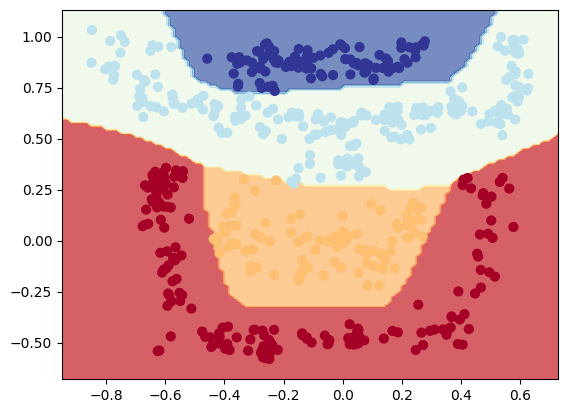

In [121]:

plot_decision_boundary(model_0,X_test,y_test)